***PART 1 - LOADING LIBRARIES AND DATABASE***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

pd.options.display.max_columns = None #The dataset is huge. To see all of the columns, we change max columns


In [2]:
fname1 = 'Building_Permits.csv'


In [3]:
dataset = pd.read_csv(fname1, low_memory=False)

In [4]:
dataset.shape

(1193083, 53)

In [5]:
dataset.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID', 'SF Fi

In [9]:
#date range verification
print('Earliest date db1=', dataset['Filed Date'][0])
print('Last date db1 = ', dataset['Filed Date'].tail(1))

Earliest date db1= 10/24/2019
Last date db1 =  1193082    12/06/1983
Name: Filed Date, dtype: object


In the following, we will convert Date columns to Datetime. It will be useful to avoid problems with our visualizations.

In [10]:
date_cols = [col for col in dataset.columns if 'date' in col.lower()]
date_cols

['Permit Creation Date',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'Completed Date',
 'First Construction Document Date',
 'Permit Expiration Date']

In [11]:
dataset['Permit Creation Date'][0]

'10/24/2019'

In [28]:
for col in date_cols:
    dataset.loc[:,col] = pd.to_datetime(dataset[col], errors = 'coerce')
    print('Col :',col, ' Min= ', dataset.loc[:,col].min(), 'Max= ', dataset.loc[:,col].max())
    #we used errors = coerce, as there are some values/outliers out of the bound     

Col : Permit Creation Date  Min=  1901-03-10 00:00:00 Max=  2022-08-05 00:00:00
Col : Current Status Date  Min=  1968-10-25 00:00:00 Max=  2022-08-05 00:00:00
Col : Filed Date  Min=  1901-03-10 00:00:00 Max=  2022-08-05 00:00:00
Col : Issued Date  Min=  1906-11-08 00:00:00 Max=  2022-08-05 00:00:00
Col : Completed Date  Min=  1900-03-01 00:00:00 Max=  2022-08-05 00:00:00
Col : First Construction Document Date  Min=  1989-03-27 00:00:00 Max=  2022-08-04 00:00:00
Col : Permit Expiration Date  Min=  1948-11-13 00:00:00 Max=  2031-01-29 00:00:00


In [29]:
dataset[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193083 entries, 0 to 1193082
Data columns (total 7 columns):
 #   Column                            Non-Null Count    Dtype         
---  ------                            --------------    -----         
 0   Permit Creation Date              1193083 non-null  datetime64[ns]
 1   Current Status Date               1193071 non-null  datetime64[ns]
 2   Filed Date                        1193067 non-null  datetime64[ns]
 3   Issued Date                       1133452 non-null  datetime64[ns]
 4   Completed Date                    666075 non-null   datetime64[ns]
 5   First Construction Document Date  14580 non-null    datetime64[ns]
 6   Permit Expiration Date            1008221 non-null  datetime64[ns]
dtypes: datetime64[ns](7)
memory usage: 63.7 MB


In [31]:
dataset[date_cols].describe(datetime_is_numeric=True )

,Permit Creation Date,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Permit Expiration Date
count,1193083,1193071,1193067,1133452,666075,14580,1008221
mean,2004-10-04 02:12:47.727308288,2005-06-17 07:21:16.222119040,2004-10-05 02:59:20.432397952,2004-11-02 17:29:32.602633600,2004-09-15 10:47:11.389257728,2009-09-16 07:38:10.370370560,2004-10-05 15:41:19.759894016
min,1901-03-10 00:00:00,1968-10-25 00:00:00,1901-03-10 00:00:00,1906-11-08 00:00:00,1900-03-01 00:00:00,1989-03-27 00:00:00,1948-11-13 00:00:00
25%,1996-03-26 00:00:00,1996-12-25 00:00:00,1996-03-27 00:00:00,1996-06-21 00:00:00,1995-01-23 00:00:00,2003-07-21 00:00:00,1995-10-10 00:00:00
50%,2005-09-09 00:00:00,2006-07-10 00:00:00,2005-09-09 00:00:00,2005-09-13 00:00:00,2005-11-17 00:00:00,2008-08-01 00:00:00,2004-10-08 00:00:00
75%,2014-04-17 00:00:00,2014-11-14 00:00:00,2014-04-17 00:00:00,2014-02-27 00:00:00,2014-07-24 00:00:00,2016-06-24 00:00:00,2014-08-03 00:00:00
max,2022-08-05 00:00:00,2022-08-05 00:00:00,2022-08-05 00:00:00,2022-08-05 00:00:00,2022-08-05 00:00:00,2022-08-04 00:00:00,2031-01-29 00:00:00


In [ ]:
fig = px.bar (dataset, x=date_cols[0],
                   title='Histogram of Permits in San Francisco',
                   #labels={'total_bill':'total bill'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   hover_data=["Permit Type Definition"],
                   color_discrete_sequence=['indianred'] # color of histogram bars
                   )
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [40]:
dataset[date_cols[0]][1].year

2020

In [18]:
m1 = dataset['Completed Date'] == '208-03-24 00:00:00'
dataset.loc[m1,:]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,SF Find Neighborhoods 2,Current Police Districts 2,Current Supervisor Districts 2,Analysis Neighborhoods 2,DELETE - Zip Codes 2,DELETE - Fire Prevention Districts 2,DELETE - Supervisor Districts 2,DELETE - Current Police Districts 2,DELETE - Supervisorial_Districts_Waterline_data_from_7pkg_wer3 2,Neighborhoods


In [41]:
dataset.nunique()

Permit Number                             313948
Permit Type                                    8
Permit Type Definition                         8
Permit Creation Date                        2485
Block                                       5007
Lot                                         1288
Street Number                               5382
Street Number Suffix                          18
Street Name                                 1790
Street Suffix                                 21
Unit                                         855
Unit Suffix                                  209
Description                               236016
Current Status                                18
Current Status Date                         2528
Filed Date                                  2486
Issued Date                                 2484
Completed Date                              2446
First Construction Document Date            1719
Structural Notification                        1
Number of Existing S

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343459 entries, 0 to 343458
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           343459 non-null  object 
 1   Permit Type                             343459 non-null  int64  
 2   Permit Type Definition                  343459 non-null  object 
 3   Permit Creation Date                    343459 non-null  object 
 4   Block                                   343459 non-null  object 
 5   Lot                                     343459 non-null  object 
 6   Street Number                           343459 non-null  int64  
 7   Street Number Suffix                    4530 non-null    object 
 8   Street Name                             343459 non-null  object 
 9   Street Suffix                           338614 non-null  object 
 10  Unit                                    5009

In [10]:
keep_columns = [
                'Permit Number',
       'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix',
    'Description', #test
    'Current Status', #test
    'Current Status Date', 
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',#test
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description',
       'Zipcode',
       'Location']

***Let's investigate permit type definition*** 

In [84]:
mask3 = dataset['Permit Type Definition'] == 'new construction'
ds1 = dataset.loc[mask3,['Description','Number of Existing Stories', 'Number of Proposed Stories','Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units','Revised Cost','Estimated Cost']]

In [85]:
ds1

,Description,Number of Existing Stories,Number of Proposed Stories,Existing Use,Existing Units,Proposed Use,Proposed Units,Revised Cost,Estimated Cost
1340,"to erect 8 stories, 1 basement, 114 units resi...",NaN,8.0,NaN,NaN,apartments,114,"35,000,000","35,000,000"
2710,"to erect 160 units, 11 stories with basement m...",NaN,11.0,NaN,NaN,apartments,160,"29,011,002","20,000,000"
2711,"to erect 160 units, 11 stories with basement m...",NaN,11.0,NaN,NaN,apartments,160,"29,011,002","20,000,000"
3565,"erect new 6 stories, 2 dwelling units building.",NaN,6.0,NaN,NaN,2 family dwelling,2,"1,570,000","1,570,000"
3623,"erect new 6 stories, 2 dwelling units building.",NaN,6.0,NaN,NaN,2 family dwelling,2,"1,570,000","1,570,000"
...,...,...,...,...,...,...,...,...,...
340018,"erect 55-stories over 2-basement, mixed use re...",NaN,55.0,NaN,NaN,apartments,966,NaN,"430,000,000"
340020,dir #17-02: 100% affordable housing - erect ii...,NaN,7.0,NaN,NaN,apartments,151,NaN,"80,000,000"
342397,"to erect 7 stories, no basement, type iii-a ov...",NaN,7.0,NaN,NaN,apartments,24,NaN,"8,000,000"
342918,"bldg e - mayor's ed# 17-02. erect a 7-story, t...",NaN,7.0,NaN,NaN,apartments,128,NaN,"72,464,450"


In [87]:
ds1.plot?

Signature:      ds1.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x7fc32f45b880>
File:           /opt/conda/lib/python3.9/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - '

TypeError: 'value' must be an instance of str or bytes, not a float

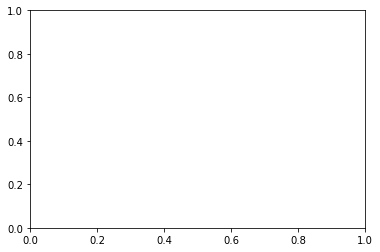

In [91]:
ds1.plot(x='Proposed Units', y= 'Estimated Cost',kind='scatter')

In [75]:
dataset.loc[mask3,:].nunique()

Permit Number                             586
Permit Type                                 1
Permit Type Definition                      1
Permit Creation Date                      390
Block                                     327
Lot                                       135
Street Number                             447
Street Number Suffix                       11
Street Name                               213
Street Suffix                               8
Unit                                        1
Unit Suffix                                 2
Description                               588
Current Status                              7
Current Status Date                       412
Filed Date                                391
Issued Date                               266
Completed Date                            137
First Construction Document Date          192
Structural Notification                     0
Number of Existing Stories                  0
Number of Proposed Stories        

In [71]:
dataset['Filed Date'].shape

(343459,)

In [68]:
new_const=dataset.loc[mask3,:]
new_const.to_csv('new_const.csv')

In [73]:
mask2 = dataset['Permit Type Definition'] == 'sign - erect'
dataset.loc[mask2,'Description'][0:10]

21        erect a two wall signs same size two location.
38                    erect 1 illuminated monument sign.
39                    erect 1 illuminated monument sign.
54     install 1 double face, illuminated directional...
65                   to erect single faced electric sign
231           to replace single faced electric wall sign
233                  to erect projecting electrical sign
283              to erect single face electric wall sign
677       re-face (3) existing wall signs for "citibank"
679     re-face (2) existing canopy signs for "citibank"
Name: Description, dtype: object

In [ ]:
mask2 = dataset['Permit Type Definition'] == 'otc alterations permit'
dataset.loc[mask2,'Description'][0:10]

In [45]:
dataset['Permit Type Definition'].unique()

array(['otc alterations permit', 'sign - erect', 'wall or painted sign',
       'additions alterations or repairs', 'new construction wood frame',
       'demolitions', 'new construction',
       'grade or quarry or fill or excavate'], dtype=object)

In [46]:
dataset['Permit Type Definition'].value_counts()

otc alterations permit                 309187
additions alterations or repairs        24914
sign - erect                             5012
new construction wood frame              1499
demolitions                              1155
wall or painted sign                      834
new construction                          699
grade or quarry or fill or excavate       159
Name: Permit Type Definition, dtype: int64

In [31]:
dataset['Number of Proposed Stories'].unique()

array([  nan,   1. ,  26. ,   3. ,   7. ,  16. ,  34. ,  20. ,   2. ,
        24. ,   5. ,   6. ,   4. ,   9. ,  48. ,  18. ,  38. ,  19. ,
        11. ,  30. ,  15. ,   8. ,  25. ,  12. ,  14. ,  53. ,  52. ,
        37. ,  13. ,  31. ,  23. ,  36. ,  40. ,  32. ,  39. ,  10. ,
        22. ,  43. ,  33. ,  55. ,  50. ,  42. ,  17. ,  21. ,  60. ,
        58. ,  29. ,  35. ,   0. ,  45. ,  28. ,  63. ,  27. ,  62. ,
        41. ,  47. ,  46. ,  54. ,  61. ,  44. ,  49. ,  78. ,  56. ,
         2.5,   1.5,  51. ,  67. , 479. ,  59. ,  64. ,  85. ,  57. ,
       118. , 220. ])

In [33]:
dataset['Number of Proposed Stories'].value_counts()

2.0      88352
3.0      81174
4.0      32108
1.0      13582
5.0       7309
         ...  
51.0         1
479.0        1
85.0         1
118.0        1
220.0        1
Name: Number of Proposed Stories, Length: 73, dtype: int64

In [44]:
pd.set_option('display.max_columns',100)
mask1= dataset['Number of Proposed Stories'] == 51.0
display(dataset.loc[mask1,:])

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
205393,201804206992,8,otc alterations permit,04/20/2018,0259,026,555,NaN,California,St,NaN,NaN,49th floor: t.i. to demo and construct new pa...,complete,12/17/2018,04/20/2018,04/26/2018,12/17/2018,NaN,NaN,51.0,51.0,NaN,NaN,04/10/2021,"1,675,914","1,675,914",office,0,office,0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Financial District/South Beach,94104.0,POINT (-122.4034859548936 37.79226164705224),150513766052


In [29]:
dataset['Number of Existing Stories'].unique()

array([ nan,  1. , 26. ,  3. ,  7. , 16. , 34. , 20. ,  2. , 24. ,  5. ,
        4. ,  6. ,  9. , 48. , 18. , 38. , 19. , 11. , 30. , 15. ,  8. ,
       25. , 12. , 14. , 53. , 52. , 37. , 13. , 31. , 23. , 36. , 40. ,
       32. , 39. , 10. , 22. , 43. , 33. ,  0. , 55. , 50. , 42. , 17. ,
       21. , 60. , 58. , 29. , 35. , 45. , 28. , 63. , 27. , 41. , 47. ,
       46. , 61. , 44. , 49. , 54. , 78. ,  2.5,  1.5, 62. , 56. , 51. ,
       67. , 59. , 64. , 85. , 88. , 57. ])

In [30]:
dataset['Number of Existing Stories'].value_counts()

2.0     91569
3.0     79503
4.0     29524
1.0     15277
5.0      6783
        ...  
64.0        2
78.0        1
51.0        1
85.0        1
88.0        1
Name: Number of Existing Stories, Length: 71, dtype: int64

In [27]:
dataset['Current Status'].value_counts() #we can delete withdrawn and some other permits

complete       185599
issued         126313
filed           18145
withdrawn        3905
expired          3828
cancelled        3685
reinstated        791
approved          726
suspend           241
revoked           115
disapproved        62
plancheck          25
denied              9
appeal              3
unknown             2
overruled           1
incomplete          1
upheld              1
Name: Current Status, dtype: int64

In [19]:
dataset['Description'][:5] #information on where construction takes place

0                                         street space
1                    street space and side walk repair
2    remove two extg concrete columns and replace w...
3                                         street space
4    add 8-inch double detector check backflow prev...
Name: Description, dtype: object

In [79]:
mask5 = dataset['Permit Type Definition'] == 'new construction wood frame'
dataset.loc[mask5,:].nunique()


Permit Number                             1235
Permit Type                                  1
Permit Type Definition                       1
Permit Creation Date                       683
Block                                      634
Lot                                        255
Street Number                              928
Street Number Suffix                         5
Street Name                                422
Street Suffix                               11
Unit                                         4
Unit Suffix                                  4
Description                               1029
Current Status                              10
Current Status Date                        757
Filed Date                                 685
Issued Date                                435
Completed Date                             335
First Construction Document Date           312
Structural Notification                      1
Number of Existing Stories                   1
Number of Pro